## 과제

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [87]:
# 데이터 불러오기
data = pd.read_csv('C:/Users/wjdgh/Desktop/YBIGTA/Summer Session/0713 Basic Statistics, Regression Analysis/Student_Performance.csv', index_col = 0)
data.head(10)

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
5,3,78,9,6,61.0,0
6,7,73,5,6,63.0,1
7,8,45,4,6,42.0,1
8,5,77,8,2,61.0,0
9,4,89,4,0,69.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [88]:
data1 = data
Y = data1["PI"]
X = data1.drop(["PI"],axis=1)
X = sm.add_constant(X)

model1 = sm.OLS(Y, X)
res1 = model1.fit()

print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:43:23   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [89]:
data2 = data
Y = data2["PI"]
X = data2["Study_Hours"]
X = sm.add_constant(X)

model2 = sm.OLS(Y, X)
res2 = model2.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:43:25   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

결정계수 값을 보면 확실히 Study_Hours 하나만 predictor variable로 지정할 때보다 나머지 값들을 모두 predictor variable로 지정하는 것이 편차의 분산 중 더 큰 수치를 설명할 수 있습니다. 또한, Study_Hour 혼자만으로도 0.140에 달하는 결정계수 값을 도출하기 때문에 중간 정도의 영향력을 지닌다고 생각할 수 있을것 같습니다.

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

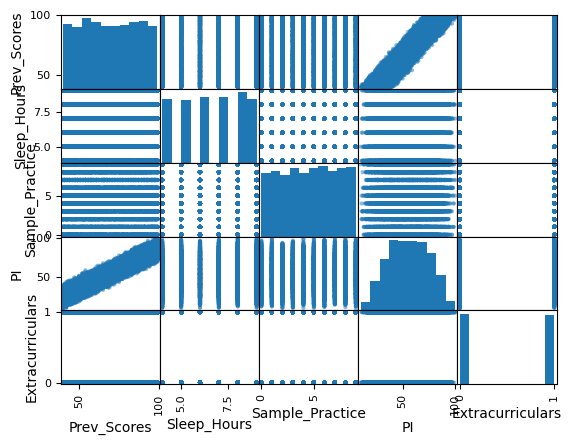

In [131]:
data1 = data
Y = data1["PI"]
X = data1.drop(["PI"],axis=1)
X = sm.add_constant(X)

X_ = data.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

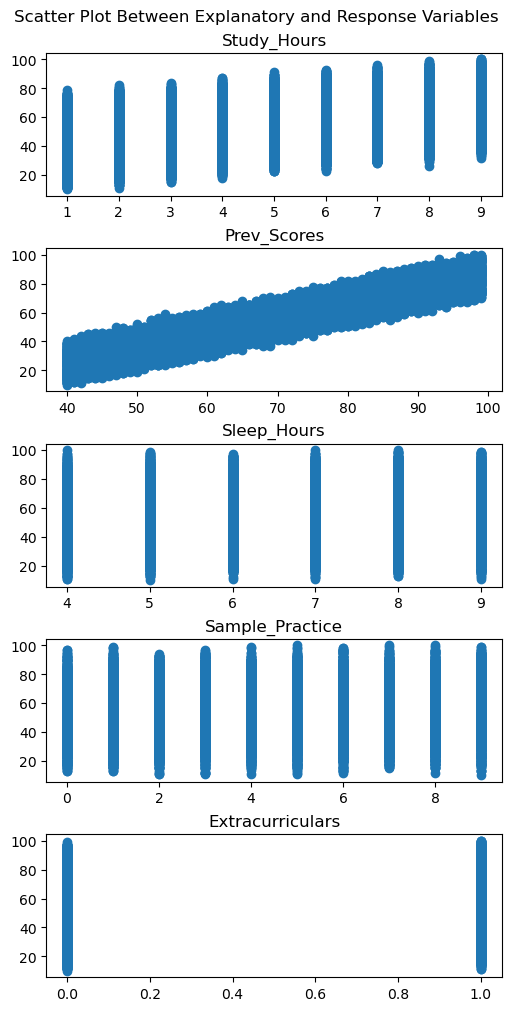

In [139]:
data_scatter = data
data_scatter["Study_Hours * Prev_Scores"] = data_scatter["Study_Hours"] * data_scatter["Prev_Scores"]
data_scatter["Sample_Practice * Prev_Scores"] = data_scatter["Sample_Practice"] * data_scatter["Prev_Scores"]
data_scatter["Study_Hours * Sample_Practice"] = data_scatter["Study_Hours"] * data_scatter["Sample_Practice"]

Y = data_scatter["PI"]
X = data_scatter.drop(["PI"],axis=1)

def draw_scatter(row, col, title):
    X_cols = list(X.columns)
    fig, axs = plt.subplots(row,col, figsize = (5,10), layout = 'constrained')
    fig.suptitle(title)

    for ax in range(row*col):
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X[X_cols[ax]], Y)
    plt.show()
    
draw_scatter(5,1,"Scatter Plot Between Explanatory and Response Variables")

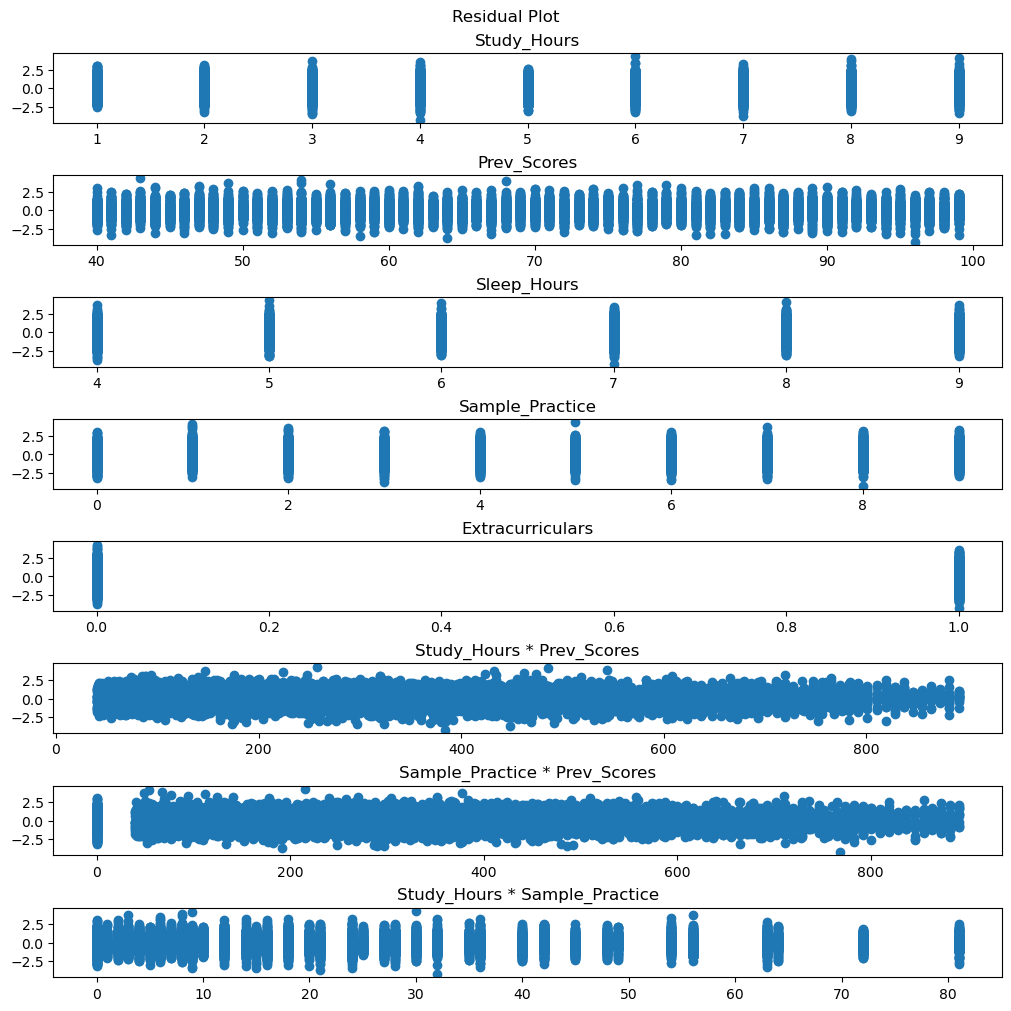

In [142]:
data_resid = data
Y = data_resid["PI"]
X = data_resid.drop(["PI"],axis=1)
X = sm.add_constant(X)

model_resid = sm.OLS(Y, X)
res = model_resid.fit()
sqrt_mse = np.sqrt(res.mse_resid) ## square root of mse
std_res = res.resid/sqrt_mse ## studentized residual
 
def draw_residual(row, col, title):
    X_cols = list(X.columns)
    fig, axs = plt.subplots(row, col, figsize = (10,10), layout = 'constrained')
    fig.set_facecolor('white')
    fig.suptitle(title)

    for ax in range(row*col):
        axs[ax].set_title(X_cols[ax+1])
        axs[ax].scatter(X[X_cols[ax+1]], std_res)
    plt.show()
    
draw_residual(8,1,"Residual Plot")

미묘하긴 하지만 Sample_Practice는 파동 형태를 가지고 있고, 공분산 가정에 살짝 어긋난다고 생각합니다. 
Study_Hours와 Sample_Practice 사이에 interaction effect가 존재하는것 같습니다.

C:\Users\wjdgh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


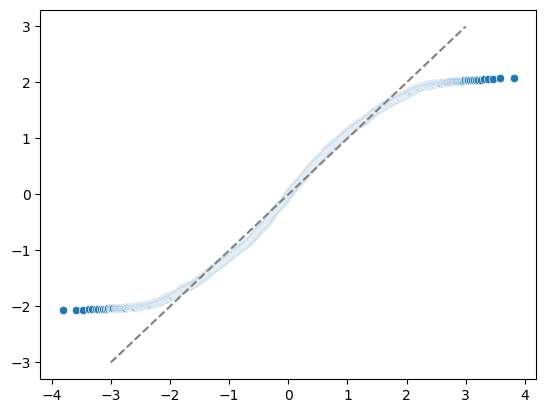

In [141]:
import scipy.stats as stats

fitted = res.predict(data_resid)
residual = data_resid["PI"] - fitted

sr = stats.zscore(residual)
(x,y), _ = stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')


양 극단을 제외한 부분은 정규분포를 비교적 잘 따릅니다.